## MIS 49Y APPLIED MACHINE LEARNING - 2023 Fall - HOMEWORK 2 
### Aleyna Hasagdas - Sena Oz


## 1. Activation Functions

ANNs use the Activation Functions to perform complex computations in the hidden layers and then transfer the result to the output layer. Activation Functions introduces non-linear properties in the neural network. Some popular activation functions are Sigmoid, Softmax, Tanh, ReLU, Leaky ReLU, Parameterized ReLU, Exponential Linear Unit, Swish, Binary Step, Linear Activation Function.


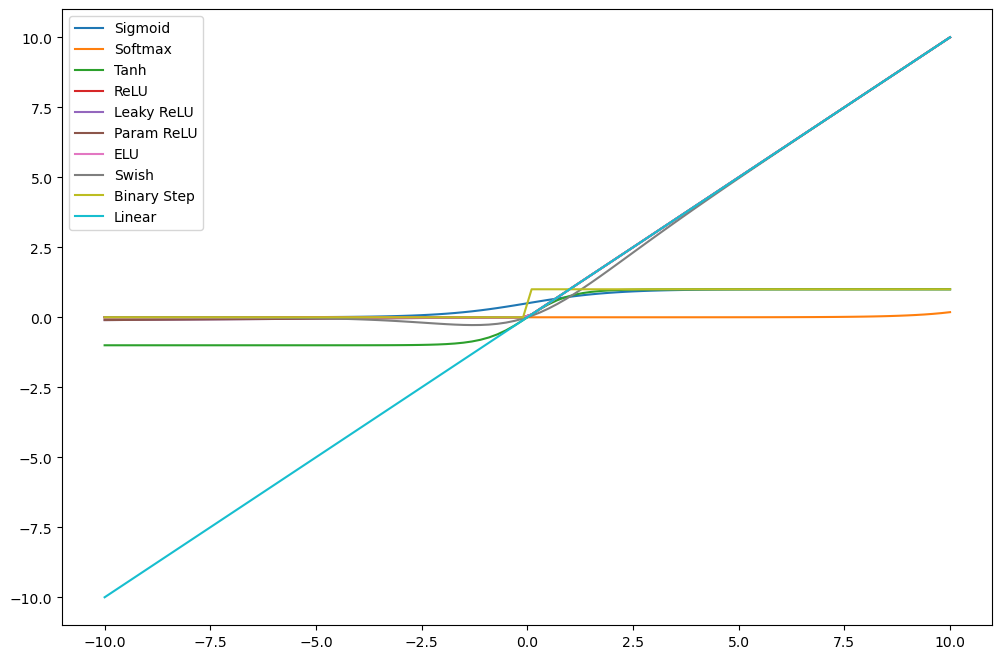

In [62]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)


def tanh(x):
    return np.tanh(x)


def relu(x):
    return np.maximum(0, x)


def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)


def param_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)


def elu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))


def swish(x, beta=1):
    return x * sigmoid(beta * x)


def binary_step(x):
    return np.where(x < 0, 0, 1)


def linear(x):
    return x


x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, softmax(x), label='Softmax')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.plot(x, param_relu(x), label='Param ReLU')
plt.plot(x, elu(x), label='ELU')
plt.plot(x, swish(x), label='Swish')
plt.plot(x, binary_step(x), label='Binary Step')
plt.plot(x, linear(x), label='Linear')
plt.legend()
plt.show()

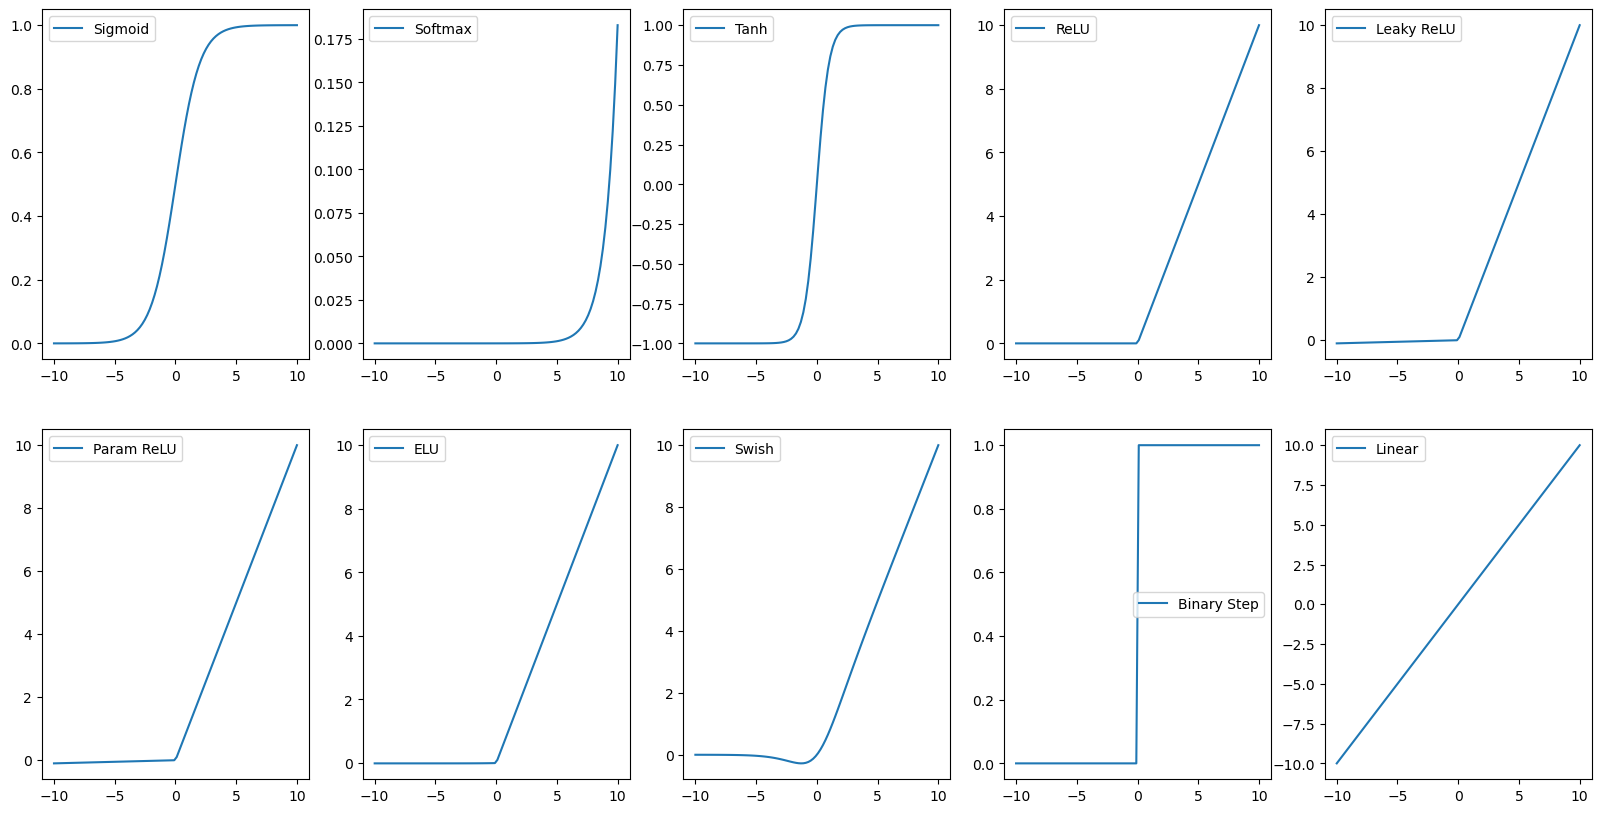

In [63]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 5, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.legend()

plt.subplot(2, 5, 2)
plt.plot(x, softmax(x), label='Softmax')
plt.legend()

plt.subplot(2, 5, 3)
plt.plot(x, tanh(x), label='Tanh')
plt.legend()

plt.subplot(2, 5, 4)
plt.plot(x, relu(x), label='ReLU')
plt.legend()

plt.subplot(2, 5, 5)
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.legend()

plt.subplot(2, 5, 6)
plt.plot(x, param_relu(x), label='Param ReLU')
plt.legend()

plt.subplot(2, 5, 7)
plt.plot(x, elu(x), label='ELU')
plt.legend()

plt.subplot(2, 5, 8)
plt.plot(x, swish(x), label='Swish')
plt.legend()

plt.subplot(2, 5, 9)
plt.plot(x, binary_step(x), label='Binary Step')
plt.legend()

plt.subplot(2, 5, 10)
plt.plot(x, linear(x), label='Linear')
plt.legend()

plt.show()

## 2. ANN Optimizers
Optimizers are methods used to determine the features of the neural networks such as weights and learning rate to reduce the losses. Some popular optimizers are Gradient Descent, Stochastic Gradient Descent (SGD), Adam, RMSprop, AdaGrad optimizers.

a) What is an ANN Optimizer?
b) How do the backpropagation algorithm and optimizers relate?
c) Select three optimizers and compare them.

### a) What is an ANN Optimizer?

An Artificial Neural Network (ANN) optimizer is a mathematical algorithm that adjusts the weights and biases of a neural network during the training process to minimize the error or loss function. The primary goal of optimization is to find the optimal set of parameters that allows the neural network to make accurate predictions on new, unseen data. Optimizers play a crucial role in the training of neural networks by guiding the learning process to converge towards the global or local minimum of the loss function.


### b) How do the backpropagation algorithm and optimizers relate?

The backpropagation algorithm is the central mechanism for training neural networks. It is a supervised learning algorithm that consists of a forward pass (where input data is propagated through the network to produce predictions) and a backward pass (where the error is backpropagated through the network, and weights are updated). The backpropagation algorithm computes the gradients of the loss with respect to the weights, indicating how much each weight contributes to the error.

Optimizers come into play during the weight update step of the backpropagation algorithm. After the gradients are computed, the optimizer adjusts the weights and biases to minimize the loss function. Different optimizers use various strategies to update the weights, such as adjusting the learning rate, incorporating momentum, or adapting the learning rate based on the historical gradients.



### c) Comparison of Three Optimizers: Gradient Descent, Adam, RMSprop


#### Gradient Descent:
Gradient Descent is a first-order optimization algorithm that is used to find the minimum of a function. It is a simple and widely used optimization algorithm that is based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum. Gradient descent is best used when the parameters cannot fit into the memory and when there is a large training dataset. It is also used when the training dataset is noisy.


#### Adam:
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data. Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. Adam is relatively easy to configure where the default configuration parameters do well on most problems.


#### RMSprop:
RMSprop is an unpublished, adaptive learning rate method proposed by Geoff Hinton in Lecture 6e of his Coursera Class. RMSprop and Adam are two methods that deal with the exponentially weighted average of past gradients. RMSprop divides the learning rate by an exponentially decaying average of squared gradients. This means that the learning rate is decreased for dimensions with large gradients and increased for dimensions with small gradients. It is a very effective and efficient optimization algorithm for deep neural networks.

## 3. ANN Usage Demo
a) Build a ANN based machine learning model for any problem (and dataset) you are interested in.

b) Support your solution with plot(s) and model evaluation metrics.

c) Use at least two different Activation Functions and two optimizers and compare results. Which one would you select for your problem? Why?

In [64]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Iris dataset from UCI Machine Learning Repository with sklearn datasets
# https://archive.ics.uci.edu/dataset/53/iris
iris = load_iris()
X = iris.data
y = iris.target

In [65]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [67]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Defining the models with different activation functions and optimizers
models = {
    'ReLU with Adam': MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000,
                                    random_state=42),
    'Sigmoid with Adam': MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', max_iter=1000,
                                       random_state=42),
    'ReLU with SGD': MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', max_iter=1000,
                                   random_state=42),
    'Sigmoid with SGD': MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd', max_iter=1000,
                                      random_state=42),
}

/Users/senaoz/anaconda3/envs/49Y/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/senaoz/anaconda3/envs/49Y/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/senaoz/anaconda3/envs/49Y/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


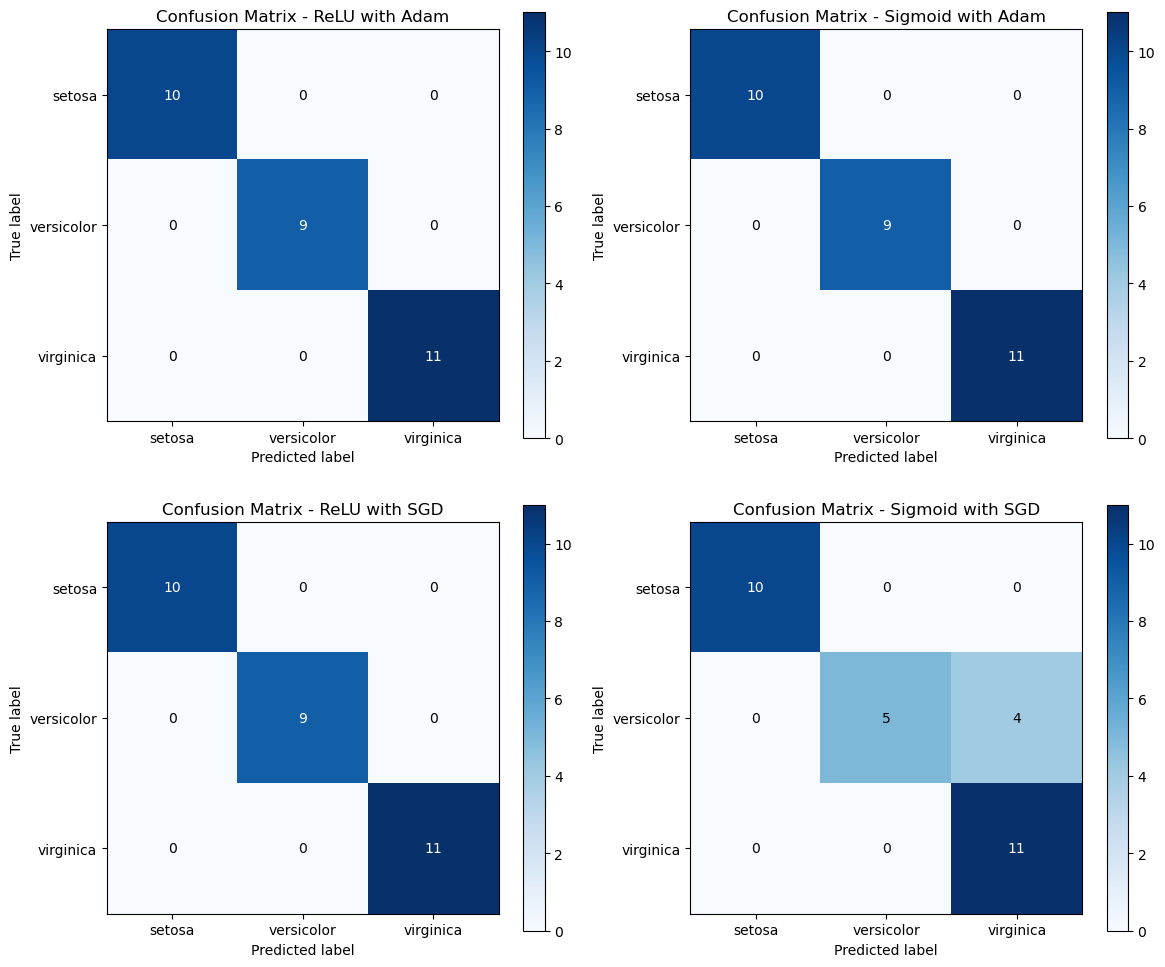

In [69]:
results = {}

#  Maximum iterations (1000) reached and the optimization hasn't converged yet.

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': confusion,
        'classification_report': classification_rep
    }

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (name, result), ax in zip(results.items(), axes.flatten()):
    cmap = plt.cm.Blues
    im = ax.imshow(result['confusion_matrix'], interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # All ticks and label them with the respective list entries
    ax.set(xticks=np.arange(result['confusion_matrix'].shape[1]),
           yticks=np.arange(result['confusion_matrix'].shape[0]),
           xticklabels=iris.target_names, yticklabels=iris.target_names,
           title=f'Confusion Matrix - {name}',
           ylabel='True label',
           xlabel='Predicted label')

    # Data dimensions and text annotations
    thresh = result['confusion_matrix'].max() / 2.
    for i in range(result['confusion_matrix'].shape[0]):
        for j in range(result['confusion_matrix'].shape[1]):
            ax.text(j, i, format(result['confusion_matrix'][i, j], 'd'),
                    ha="center", va="center",
                    color="white" if result['confusion_matrix'][i, j] > thresh else "black")

plt.tight_layout()

In [70]:
# Classification reports
for name, result in results.items():
    print(f"\n{name}:\n{result['classification_report']}")

plt.show()


ReLU with Adam:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Sigmoid with Adam:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


ReLU with SGD:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.0

In [71]:
# Accuracies
for name, result in results.items():
    print(f"{name}: {result['accuracy']}")

ReLU with Adam: 1.0
Sigmoid with Adam: 1.0
ReLU with SGD: 1.0
Sigmoid with SGD: 0.8666666666666667


In this example, we're using the Iris dataset, a popular dataset for classification. The code defines four different models with varying activation functions (ReLU and Sigmoid) and optimizers (Adam and SGD). It then trains each model, evaluates their performance using accuracy, confusion matrices, and classification reports, and finally plots the confusion matrices.

After running the code, we can observe the performance of each model. Depending on the specific characteristics of the problem and the dataset, you can choose the model with the best performance. Typically, Adam optimizer is preferred for its adaptive learning rates, and ReLU activation function is commonly used for hidden layers. However, the optimal choice may vary depending on the specific problem at hand, and it's always a good practice to experiment and tune hyperparameters for better results.